# Chapitre 7: apprentissage non supervisé
Apprentissage non supervisé est une méthode au lieux de presenté a la machine des exemple (x, y), on lui fournit uniquement les données X et on lui demande d'evauée la structure de ces données X pour apprendre elle meme a réalisé certaines taches.

Par Exemple la machine peut apprendre a classer des données en les regroupant uniquement selon leur ressemblance c'est ce qu'on appelle faire du clustering ou en français de la classification non supervisé.

Une des caractéristiques fondamentales des algorithmes non supervisés est la réduction de la dimensionnalité toute en conservant les principales informations.

Première methode est le Clusturing. Son principe est :
1. Affectation des points de dataset au centre **le plus proche**.
2. déplacement du centre a la moyenne du cluster.

Le probléme avec cet algorithme est la position des centroid au debut de lencement de l'algorithme c'est pour ca souvent on l'execute avec different positions de départ. la solution retenu est celle qui **minimise** la somme des distances entre les points (x) du cluster et sont centre.

K-means cherche la position des centres qui minimise la distance entre les points d'un cluster (xi) et et sont centre (u). cela équivaut a **minimiser** la variance des clusters.

In [118]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np

Génération des données 

In [121]:
x, y = make_blobs(n_samples=100, centers=3, cluster_std=1)


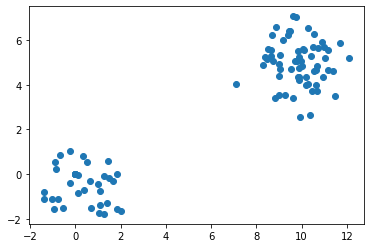

In [178]:
plt.scatter( x[:, 0], x[:, 1])
plt.show()

In [179]:
model=KMeans(n_clusters=3)
model.fit(x)

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

-133.36905039394827

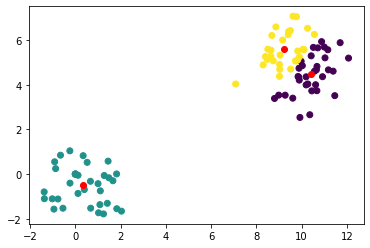

In [180]:
model.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(x)

Notre objectif est de minimisé le nombre de clusteur toute en gardant un meilleur modele.

In [181]:
#choix du nombre de voisins [ 0 - 50 ]
models= [ KMeans( n_clusters=i).fit(x, y) for i in np.arange(1, 20)]
#On calcule le score pour chaque modèle génere avec la deuxieme partie de test
inertia =[ model.inertia_ for model in models]

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a

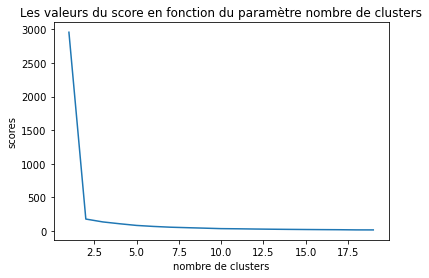

In [182]:
plt.plot(np.arange(1,20), inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("scores")
plt.title('Les valeurs du score en fonction du paramètre nombre de clusters')
plt.show()

On remarque que le meilleur nombre de clusters idéale est 2 est entre .

Le score est de : -175.96520869986963 


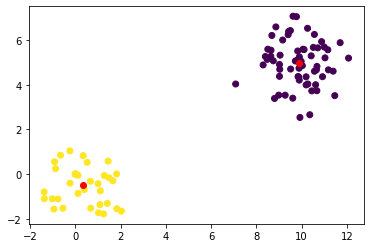

In [183]:
index_model=1#car l'index 0 correspond a n_clusters =1  & l'index 1 corespond a n_clusters =2
model=models[1]
plt.scatter(x[:, 0], x[:, 1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
print(f"Le score est de : {model.score(x)} ")

## Détection d'anomalie 
**Methode 1** : - Utilisation de la loi nomale

Détection des element x qui sont des caractéristique très eloigné des autres échantillons:
La méthode la plus facile est d'utilisé la loi nomrale en calculant la moyenne et ecartipe des données x pour déterminé une fonction densite de probabilité pour l'utilisé a fin de calculé la probabilité de chaque element x et fixé une certaine probabilité pour dire est ce que l'element est nomale ou anomale

**Methode 2** : - Utilisation de l'algorithme isolation forest

Sont principe est d'effectué une série de splits aléatoire, et on **Compte** le nombre de splits qu'il faut effectuer pour pouvoir isoler un element x.

Dans SKLearn il suffit de définir le pourcentage de données que vous désirez filtrer( taux de *contamination*)

In [184]:
from sklearn.ensemble import IsolationForest

[ 1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


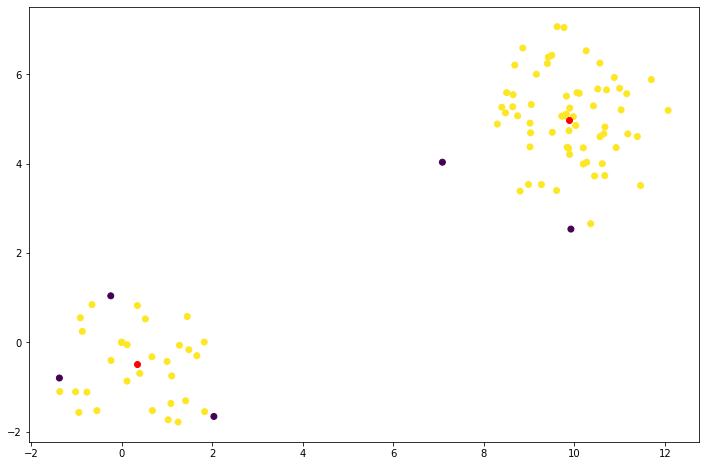

In [185]:
modele=IsolationForest(contamination = 0.05)#On supporse qu'il ya 1% de contamination dans mon dataset
modele.fit(x)
print(modele.predict(x))
plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], c=modele.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')


Donc pour avoir un meilleur score il faut supprimer les points qui sont en violet pour avoir un meilleur score et une meillleur prediction

In [191]:
filtre=
x_new=x[modele.predict(x) != -1]


Le score est de : -175.96520869986963 


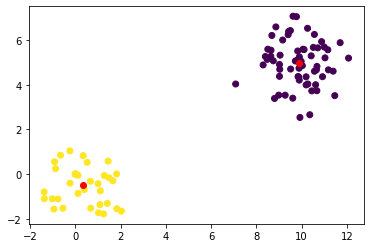

In [192]:
index_model=1#car l'index 0 correspond a n_clusters =1  & l'index 1 corespond a n_clusters =2
model=models[1]
plt.scatter(x[:, 0], x[:, 1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
print(f"Le score est de : {model.score(x)} ")